## Imports

In [1]:
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt
#import copy
from mxnet import nd, autograd, gluon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:442: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:2210: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:2892: DeprecationWarning: invalid escape sequence \|
  delete = set("""~!@#$%^&*()-=+~\|]}[{';: /?.>,<""")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:190: DeprecationWarning: invalid escape sequence \S
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\patches.py:515: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:78: DeprecationWarning: invalid escape sequence \p
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:442: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:474: DeprecationWar

## Set Contexts as in GPU

In [2]:
data_ctx=mx.gpu()
model_ctx=mx.gpu()
ctx=mx.gpu()

In [3]:
# def transform(data,label):
#     #templabel=label.astype(np.float32)
#     #print(label)
# #     if templabel in range(10):
# #         if templabel==1.0 or templabel==2.0:
# #             return data.astype(np.float32)/255,label.astype(np.float32)
# #     else:
#     return data.astype(np.float32)/255,label.astype(np.float32)

def transform(data, label):
    return nd.transpose(data.astype(np.float32),(2,0,1))/255, label.astype(np.float32)

In [4]:
MNIST_train=mx.gluon.data.vision.FashionMNIST(train=True,transform=transform)
MNIST_test=mx.gluon.data.vision.FashionMNIST(train=False,transform=transform)

In [5]:
MyMNIST_train12=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,3):
        MyMNIST_train12.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train12)
print(train_data_length)

MyMNIST_test12=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,3):
        MyMNIST_test12.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test12)
print(test_data_length)


MyMNIST_train123=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,4):
        MyMNIST_train123.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train123)
print(train_data_length)

MyMNIST_test123=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,4):
        MyMNIST_test123.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test123)
print(test_data_length)

MyMNIST_train1234=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,5):
        MyMNIST_train1234.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train1234)
print(train_data_length)

MyMNIST_test1234=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,4):
        MyMNIST_test1234.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test1234)
print(test_data_length)

12000
2000
18000
3000
24000
3000


## Load MNIST data

In [6]:
num_inputs=784
num_outputs=10
batch_size=64
num_layer=4
num_examples=60000

#train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
#                                      batch_size, shuffle=True)
#test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
#                                     batch_size, shuffle=False)
    
train_data12=gluon.data.DataLoader(MyMNIST_train12,batch_size,shuffle=True)
test_data12=gluon.data.DataLoader(MyMNIST_test12,batch_size,shuffle=False)


# num_inputs=784
# num_outputs=10
# batch_size=64
# num_examples=60000

#train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
#                                      batch_size, shuffle=True)
#test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
#                                     batch_size, shuffle=False)
    
train_data123=gluon.data.DataLoader(MyMNIST_train123,batch_size,shuffle=True)
test_data123=gluon.data.DataLoader(MyMNIST_test123,batch_size,shuffle=False)

train_data123=gluon.data.DataLoader(MyMNIST_train123,batch_size,shuffle=True)
test_data123=gluon.data.DataLoader(MyMNIST_test123,batch_size,shuffle=False)

train_data1234=gluon.data.DataLoader(MyMNIST_train1234,batch_size,shuffle=True)
test_data1234=gluon.data.DataLoader(MyMNIST_test1234,batch_size,shuffle=False)

## Transfer to limited cases(eg: only 1 and 2)

Each item in mx.gluon.data.vision.MNIST is a tuple of (data, label)

## Allocate parameters

In [7]:
mx.random.seed(1)

weight_scale=0.01
num_fc=128
num_filter_conv_layer1=20
num_filter_conv_layer2=50
W1=nd.random_normal(shape=(num_filter_conv_layer1,1,3,3),scale=weight_scale,ctx=ctx)
b1=nd.random_normal(shape=num_filter_conv_layer1,scale=weight_scale,ctx=ctx)

W2=nd.random_normal(shape=(num_filter_conv_layer2,num_filter_conv_layer1,5,5),scale=weight_scale,ctx=ctx)
b2=nd.random_normal(shape=num_filter_conv_layer2,scale=weight_scale,ctx=ctx)

W3=nd.random_normal(shape=(800,num_fc),scale=weight_scale,ctx=ctx)
b3=nd.random_normal(shape=num_fc,scale=weight_scale,ctx=ctx)

W4=nd.random_normal(shape=(num_fc,num_outputs),scale=weight_scale,ctx=ctx)
b4=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=ctx)

params=[W1,b1,W2,b2,W3,b3,W4,b4]

for param in params:
    param.attach_grad()
#print(params[2])
# num_hidden=30
# #weight_scale=.01
# weight_scale=.005

# W1=nd.random_normal(shape=(num_inputs,num_hidden),scale=weight_scale,ctx=model_ctx)
# b1=nd.random_normal(shape=num_hidden,scale=weight_scale,ctx=model_ctx)

# # W2=nd.random_normal(shape=(num_hidden,num_hidden),scale=weight_scale,ctx=model_ctx)
# # b2=nd.random_normal(shape=num_hidden,scale=weight_scale,ctx=model_ctx)

# # W3=nd.random_normal(shape=(num_hidden,num_outputs),scale=weight_scale,ctx=model_ctx)
# # b3=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=model_ctx)

# W2=nd.random_normal(shape=(num_hidden,num_outputs),scale=weight_scale,ctx=model_ctx)
# b2=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=model_ctx)

# #params=[W1,b1,W2,b2,W3,b3]
# params=[W1,b1,W2,b2]
# for param in params:
#     param.attach_grad()
# print(params[2][0])

## Activation functions

In [8]:
def relu(X):
    return nd.maximum(X,nd.zeros_like(X))

## Softmax output

In [9]:
def softmax(y_linear):
    exp=nd.exp(y_linear-nd.max(y_linear))
    partion=nd.nansum(exp,axis=0,exclude=True).reshape((-1,1))
    return exp/partition

## The softmax cross-entropy loss function

In [10]:
def cross_entropy(yhat,y):
    return -nd.nansum(y*nd.log(yhat),axis=0,exclude=True)

def softmax_cross_entropy(yhat_linear,y):
    return -nd.nansum(y*nd.log_softmax(yhat_linear),axis=0,exclude=True)

## Convolution and pooling layer

In [11]:
for data, _ in train_data12:
    data=data.as_in_context(ctx)
    break
conv=nd.Convolution(data=data, weight=W1, bias=b1, kernel=(3,3),num_filter=num_filter_conv_layer1)
print(conv.shape)

pool=nd.Pooling(data=conv,pool_type="max",kernel=(2,2),stride=(2,2))
print(pool.shape)

(64, 20, 26, 26)
(64, 20, 13, 13)


## Define the model

In [12]:
# def net(X):
#     h1_linear=nd.dot(X,W1)+b1
#     h1=relu(h1_linear)
    
#     h2_linear=nd.dot(h1,W2)+b2
#     #h2=relu(h2_linear)
    
#     #yhat_linear=nd.dot(h2,W3)+b3
#     return h1,h2_linear
#     #return yhat_linear

def net(X,debug=False):
    h1_conv=nd.Convolution(data=X, weight=W1, bias=b1, kernel=(3,3),num_filter=num_filter_conv_layer1)
    h1_activation=relu(h1_conv)
    h1=nd.Pooling(h1_activation, pool_type="avg", kernel=(2,2),stride=(2,2))
    if debug:
        print("h1 shape %s" % (np.array(h1.shape)))
        
    h2_conv=nd.Convolution(data=h1, weight=W2, bias=b2, kernel=(5,5),num_filter=num_filter_conv_layer2)
    h2_activation=relu(h2_conv)
    h2=nd.Pooling(h2_activation, pool_type="avg", kernel=(2,2),stride=(2,2))
    if debug:
        print("h2 shape %s" % (np.array(h2.shape)))
        
    h2=nd.flatten(h2)
    if debug:
        print("Flat h2 shape %s" % (np.array(h2.shape)))
        
    h3_linear=nd.dot(h2,W3)+b3
    h3=relu(h3_linear)
    if debug:
        print("h3 shape %s" % (np.array(h3.shape)))
        
    yhat_linear=nd.dot(h3,W4)+b4
    if debug:
        print("yhat_linear shape: %s" % (np.array(yhat_linear.shape)))
    
    return h1,h2,h3,yhat_linear
        
    

## Optimizer

In [13]:
def SGD(params,lr):
    for param in params:
        param[:]=param-lr*param.grad

## Evaluation metric

In [14]:
def evaluate_accuracy(data_iterator, net):
    numerator=0.
    denominator=0.
    for i ,(data, label) in enumerate(data_iterator):
        data=data.as_in_context(model_ctx)
        label=label.as_in_context(model_ctx)
        _,_,_,output=net(data)
        predictions=nd.argmax(output,axis=1)
        numerator+=nd.sum(predictions==label)
        denominator+=data.shape[0]
    return (numerator/denominator).asscalar()

In [15]:
print(num_layer)

4


## Execute the training loop

In [16]:
epochs=10
learning_rate=.0001
smoothing_constant=.01
loss_function_data=[]
train_accuracy_data=[]
test_accuracy_data=[]
params_data=[]

activation_data=[]
for i in range(num_layer):
    activation_data.append([])
    
    
    
    
for i in range(num_layer):    
    activation_data[i].append([])
    for j in range(num_outputs):
        activation_data[i][-1].append([])

# for i in range(10):
#     activation_data[0][-1].append([])
#     activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx)
    h=[]
    for j in range(num_layer):
        h.append(0)
    h[:]=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        for layer in range(2,num_layer):
            
            activation_data[layer][-1][int(label[j].asnumpy())].append(h[layer][0].asnumpy())
            #activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())


for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data12):
        data=data.as_in_context(model_ctx)
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,num_outputs)
        
   
        
        with autograd.record():
            _,_,_,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    for i in range(num_layer):    
        activation_data[i].append([])
        for j in range(num_outputs):
            activation_data[i][-1].append([])

        # for i in range(10):
        #     activation_data[0][-1].append([])
        #     activation_data[1][-1].append([])
        #print(label.asnumpy())
        for i, (data,label) in enumerate(train_data1234):
            data=data.as_in_context(model_ctx)
            h=[]
            for j in range(num_layer):
                h.append(0)
            h[:]=net(data)
            for j in range(len(label)):
                #print(int(label[j].asnumpy()))
                for layer in range(2,num_layer):

                    activation_data[layer][-1][int(label[j].asnumpy())].append(h[layer][0].asnumpy())
                    #activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data12, net)
    train_accuracy=evaluate_accuracy(train_data12,net)
    #temp_params=copy.deepcopy(params)
    #params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    #print(temp_params[0][0])

Epoch 0. Loss: 0.416316415723, Train_acc 0.5, Test_acc 0.5
Epoch 1. Loss: 0.341137478574, Train_acc 0.5, Test_acc 0.5
Epoch 2. Loss: 0.282975525602, Train_acc 0.5, Test_acc 0.5
Epoch 3. Loss: 0.20476577851, Train_acc 0.5, Test_acc 0.5
Epoch 4. Loss: 0.138747034009, Train_acc 0.5, Test_acc 0.5
Epoch 5. Loss: 0.125626714198, Train_acc 0.931083, Test_acc 0.941
Epoch 6. Loss: 0.0596501394153, Train_acc 0.974333, Test_acc 0.974
Epoch 7. Loss: 0.0220716399213, Train_acc 0.974, Test_acc 0.9755
Epoch 8. Loss: 0.019498183014, Train_acc 0.974583, Test_acc 0.975
Epoch 9. Loss: 0.0187675476233, Train_acc 0.973667, Test_acc 0.974


## Train with 1,2,3

In [17]:
epochs=10
learning_rate=.001
smoothing_constant=.01
#loss_function_data=[]
#train_accuracy_data=[]
#test_accuracy_data=[]
#params_data=[]
#activation_data=[[],[]]



for i in range(num_layer):
    activation_data.append([])
    
    
    
    
for i in range(num_layer):    
    activation_data[i].append([])
    for j in range(num_outputs):
        activation_data[i][-1].append([])

# for i in range(10):
#     activation_data[0][-1].append([])
#     activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx)
    h=[]
    for j in range(num_layer):
        h.append(0)
    h[:]=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        for layer in range(2,num_layer):
            
            activation_data[layer][-1][int(label[j].asnumpy())].append(h[layer][0].asnumpy())
            #activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())


for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data123):
        data=data.as_in_context(model_ctx)
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,num_outputs)
        
   
        
        with autograd.record():
            _,_,_,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    for i in range(num_layer):    
        activation_data[i].append([])
        for j in range(num_outputs):
            activation_data[i][-1].append([])

        # for i in range(10):
        #     activation_data[0][-1].append([])
        #     activation_data[1][-1].append([])
        #print(label.asnumpy())
        for i, (data,label) in enumerate(train_data1234):
            data=data.as_in_context(model_ctx)
            h=[]
            for j in range(num_layer):
                h.append(0)
            h[:]=net(data)
            for j in range(len(label)):
                #print(int(label[j].asnumpy()))
                for layer in range(2,num_layer):

                    activation_data[layer][-1][int(label[j].asnumpy())].append(h[layer][0].asnumpy())
                    #activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data123, net)
    train_accuracy=evaluate_accuracy(train_data123,net)
    #temp_params=copy.deepcopy(params)
    #params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    #print(temp_params[0][0])

Epoch 0. Loss: 0.143715966159, Train_acc 0.925667, Test_acc 0.927667
Epoch 1. Loss: 0.074411838449, Train_acc 0.933722, Test_acc 0.934
Epoch 2. Loss: 0.0653213310083, Train_acc 0.942667, Test_acc 0.941
Epoch 3. Loss: 0.0575765050252, Train_acc 0.943111, Test_acc 0.948333
Epoch 4. Loss: 0.0528477775802, Train_acc 0.951889, Test_acc 0.953667
Epoch 5. Loss: 0.0480006133159, Train_acc 0.950222, Test_acc 0.951667
Epoch 6. Loss: 0.0441763002932, Train_acc 0.958056, Test_acc 0.958333
Epoch 7. Loss: 0.0413859027982, Train_acc 0.959833, Test_acc 0.958
Epoch 8. Loss: 0.0388503253837, Train_acc 0.963111, Test_acc 0.961667
Epoch 9. Loss: 0.036695186757, Train_acc 0.964833, Test_acc 0.963333


In [18]:
epochs=10
learning_rate=.001
smoothing_constant=.01
#loss_function_data=[]
#train_accuracy_data=[]
#test_accuracy_data=[]
#params_data=[]
#activation_data=[[],[]]




for i in range(num_layer):
    activation_data.append([])
    
    
    
    
for i in range(num_layer):    
    activation_data[i].append([])
    for j in range(num_outputs):
        activation_data[i][-1].append([])

# for i in range(10):
#     activation_data[0][-1].append([])
#     activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx)
    h=[]
    for j in range(num_layer):
        h.append(0)
    h[:]=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        for layer in range(2,num_layer):
            
            activation_data[layer][-1][int(label[j].asnumpy())].append(h[layer][j].asnumpy())
            #activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())


for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx)
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,num_outputs)
        
   
        
        with autograd.record():
            _,_,_,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    for i in range(num_layer):    
        activation_data[i].append([])
        for j in range(num_outputs):
            activation_data[i][-1].append([])

        # for i in range(10):
        #     activation_data[0][-1].append([])
        #     activation_data[1][-1].append([])
        #print(label.asnumpy())
        for i, (data,label) in enumerate(train_data1234):
            data=data.as_in_context(model_ctx)
            h=[]
            for j in range(num_layer):
                h.append(0)
            h[:]=net(data)
            for j in range(len(label)):
                #print(int(label[j].asnumpy()))
                for layer in range(2,num_layer):

                    activation_data[layer][-1][int(label[j].asnumpy())].append(h[layer][0].asnumpy())
                    #activabtion_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data1234, net)
    train_accuracy=evaluate_accuracy(train_data1234,net)
    #temp_params=copy.deepcopy(params)
    #params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    #print(temp_params[0][0])

Epoch 0. Loss: 0.186272066005, Train_acc 0.854042, Test_acc 0.895333
Epoch 1. Loss: 0.137689807097, Train_acc 0.863292, Test_acc 0.910333
Epoch 2. Loss: 0.127418512901, Train_acc 0.884, Test_acc 0.895
Epoch 3. Loss: 0.119991486287, Train_acc 0.895917, Test_acc 0.916667
Epoch 4. Loss: 0.114180499085, Train_acc 0.897708, Test_acc 0.912333
Epoch 5. Loss: 0.109745632251, Train_acc 0.904417, Test_acc 0.918667
Epoch 6. Loss: 0.105682651416, Train_acc 0.905583, Test_acc 0.930667
Epoch 7. Loss: 0.10259613839, Train_acc 0.874917, Test_acc 0.843
Epoch 8. Loss: 0.0996096935511, Train_acc 0.910875, Test_acc 0.934
Epoch 9. Loss: 0.0970002898852, Train_acc 0.911083, Test_acc 0.914667


In [19]:
h[2][0]


[ 0.          1.6432054   0.28902915  0.          0.          0.1197464
  1.3691926   0.05493926  0.          0.          0.0336733   0.          0.
  0.04859166  1.00164187  0.12831578  0.76861978  0.          0.
  0.81183195  0.          0.          0.          0.          0.          0.
  0.1987671   0.          0.          0.          0.22947776  0.
  0.12720227  0.          0.          3.6004982   0.          2.33250141
  1.75492084  0.77435213  0.          0.          0.          0.19124556
  0.          0.73876405  0.          0.          0.          0.13138293
  0.39848697  1.67584574  0.73637319  1.39707541  1.71820664  0.
  0.34114975  0.          0.          0.          0.          1.55428922
  0.62645406  0.          0.0224811   0.22774276  1.5513643   0.          0.
  0.38003838  0.          1.31586957  0.          1.36281633  0.56003731
  0.30862918  0.          0.          0.          0.          1.79386818
  0.          0.          0.          1.64292145  0.34867004  0

In [20]:
activation_data[2][0][0]

[]

In [21]:
np.mean(activation_data[2][0][0],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

## Do Node data extraction

In [24]:
#activation_data[for different layers][index of neuron][index of label(number)]
#result[index of label]
total_epoch=33
total_num=4
result=[]
for i in range(total_num):
    result.append([])

for i in range(total_epoch):
    for num in range(total_num):
        result[num].append(np.mean(activation_data[2][i][num+1],axis=0))
#     result[1].append(np.mean(activation_data[0][i][2],axis=0))
#     result[2].append(np.mean(activation_data[0][i][3],axis=0))
#     result[3].append(np.mean(activation_data[0][i][4],axis=0))
# for i in range(11):
#     result[2].append(np.zeros((30)))
# for i in range(11,22):
#     result[2].append(np.mean(activation_data[0][i][3],axis=0))
    



activation_value_h3=[]
for i in range(total_num):
    
    activation_value_h3.append([])

#activation_value_h1.append([0]*num_hidden)
for i in range(num_fc):
    for num in range(total_num):
        activation_value_h3[num].append([])
#     activation_value_h1[1].append([])
#     activation_value_h1[2].append([])
#     activation_value_h1[3].append([])
    for j in range(total_epoch):
        for num in range(total_num):
            activation_value_h3[num][-1].append(result[num][j][i])
#         activation_value_h1[1][-1].append(result[1][j][i])
#         activation_value_h1[2][-1].append(result[2][j][i])
#         activation_value_h1[3][-1].append(result[3][j][i])
        #print(result[j][i])
    
    
    
result=[]
for i in range(total_num):
    result.append([])

for i in range(total_epoch):
    for num in range(total_num):
        result[num].append(np.mean(activation_data[3][i][num+1],axis=0))
#     result[1].append(np.mean(activation_data[0][i][2],axis=0))
#     result[2].append(np.mean(activation_data[0][i][3],axis=0))
#     result[3].append(np.mean(activation_data[0][i][4],axis=0))
# for i in range(11):
#     result[2].append(np.zeros((30)))
# for i in range(11,22):
#     result[2].append(np.mean(activation_data[0][i][3],axis=0))
    



activation_value_h4=[]
for i in range(total_num):
    
    activation_value_h4.append([])

#activation_value_h1.append([0]*num_hidden)
for i in range(num_outputs):
    for num in range(total_num):
        activation_value_h4[num].append([])
#     activation_value_h1[1].append([])
#     activation_value_h1[2].append([])
#     activation_value_h1[3].append([])
    for j in range(total_epoch):
        for num in range(total_num):
            activation_value_h4[num][-1].append(result[num][j][i])
#         activation_value_h1[1][-1].append(result[1][j][i])
#         activation_value_h1[2][-1].append(result[2][j][i])
#         activation_value_h1[3][-1].append(result[3][j][i])
        #print(result[j][i])
#activation_data[for different layers][index of neuron][index of label(number)]
#result[index of label]
# result=[]
# result.append([])
# result.append([])
# result.append([])
# result.append([])
# for i in range(33):
#     result[0].append(np.mean(activation_data[1][i][1],axis=0))
#     result[1].append(np.mean(activation_data[1][i][2],axis=0))  
#     result[2].append(np.mean(activation_data[1][i][3],axis=0))  
#     result[3].append(np.mean(activation_data[1][i][4],axis=0))  
        
# # for i in range(11):
# #     result[2].append(np.zeros((10)))
# # for i in range(11,22):
# #     result[2].append(np.mean(activation_data[1][i][3],axis=0))
    
    
# activation_value_h2=[]
# activation_value_h2.append([])
# activation_value_h2.append([])
# activation_value_h2.append([])
# activation_value_h2.append([])
# #activation_value_h1.append([0]*num_hidden)
# for i in range(num_outputs):
#     activation_value_h2[0].append([])
#     activation_value_h2[1].append([])
#     activation_value_h2[2].append([])
#     activation_value_h2[3].append([])
#     for j in range(33):
#         activation_value_h2[0][-1].append(result[0][j][i])
#         activation_value_h2[1][-1].append(result[1][j][i])
#         activation_value_h2[2][-1].append(result[2][j][i])
#         activation_value_h2[3][-1].append(result[3][j][i])
#         #print(result[j][i])

In [109]:
len(activation_data[2])

22

In [81]:
np.mean(activation_data[3][10][9],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [78]:
np.mean(activation_data[3][i][2],axis=0)

array([-2.06289935,  8.13198948,  8.21271515, -2.05949926, -2.13735986,
       -2.04073977, -2.18820643, -2.07732725, -1.95432937, -1.93896675], dtype=float32)

In [99]:
len(activation_value_h3[0][1])

11

In [100]:
activation_value_h4[1][0]

[-0.086706474,
 -0.19915618,
 -0.31268209,
 -0.59982616,
 -1.1012734,
 -1.4141592,
 -1.5832707,
 -1.7044518,
 -1.8362207,
 -2.0628994,
 -2.1218855]

In [101]:
activation_value_h4[2][0]

[-0.086708203,
 -0.19915691,
 -0.31268433,
 -0.5998916,
 -1.1016755,
 -1.4143444,
 -1.5821108,
 -1.7054914,
 -1.8352108,
 -2.0600667,
 -2.1179085]

In [57]:
len(activation_value_h1[0][1])

33

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


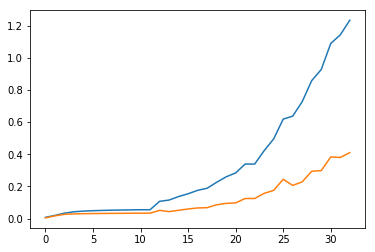

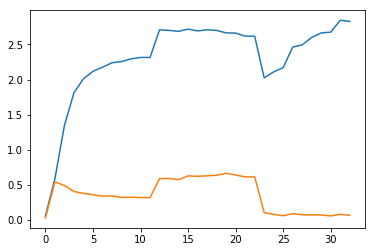

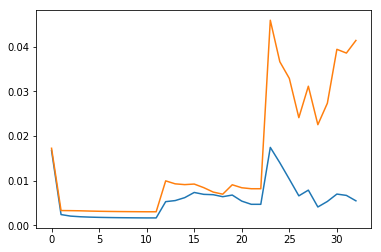

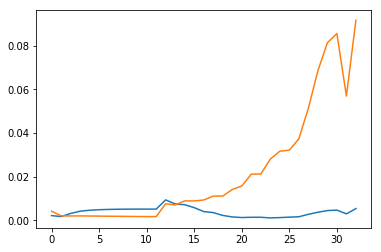

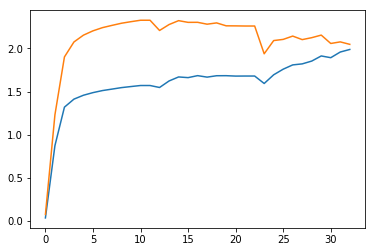

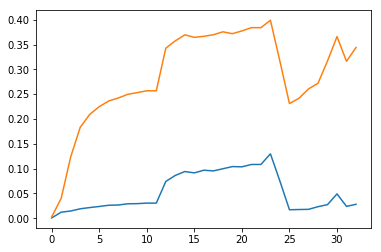

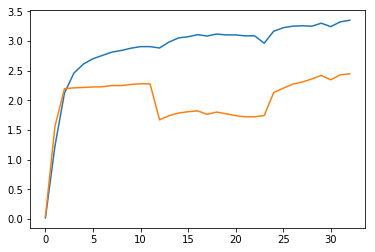

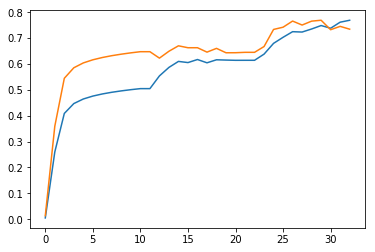

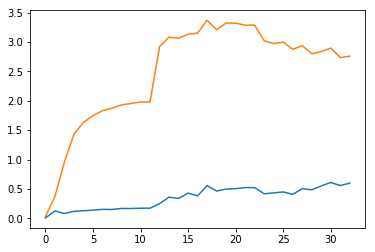

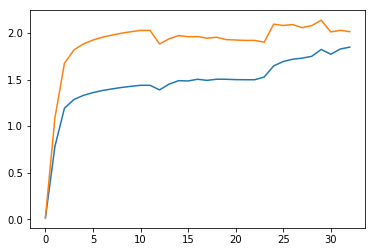

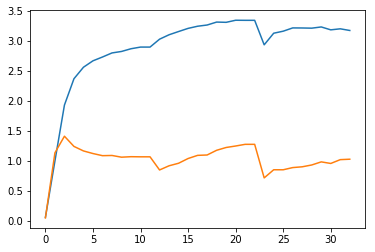

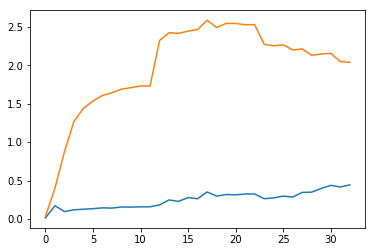

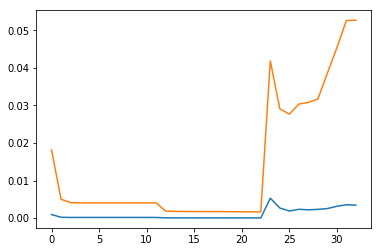

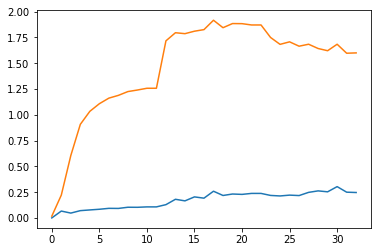

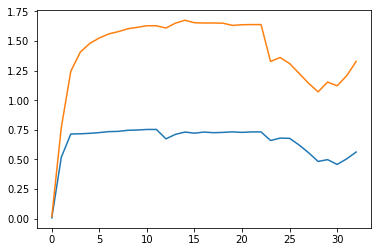

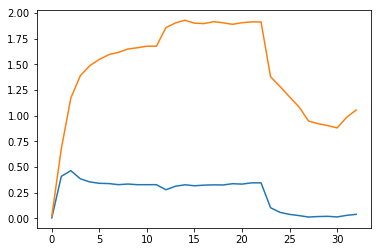

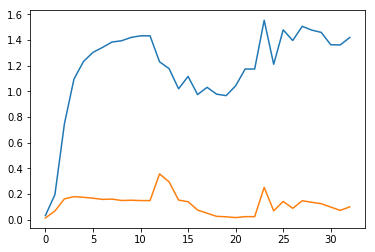

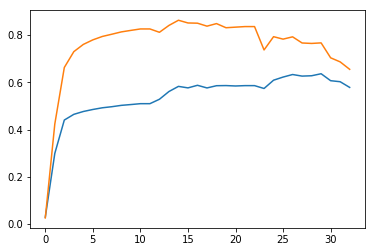

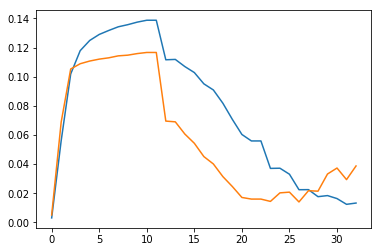

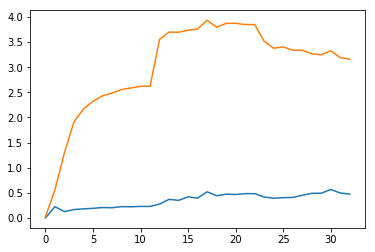

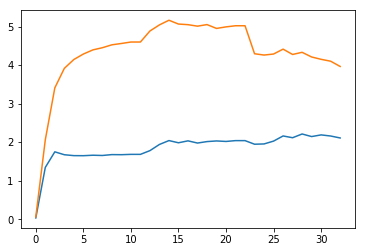

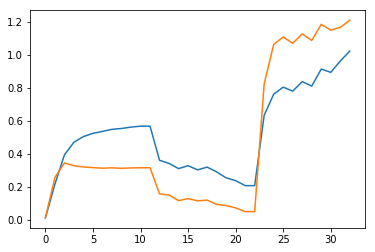

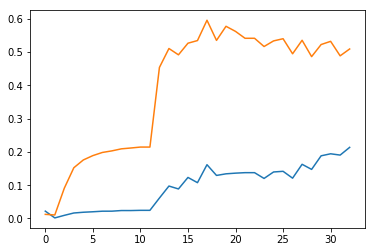

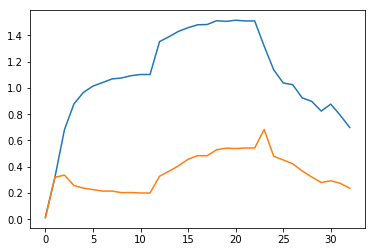

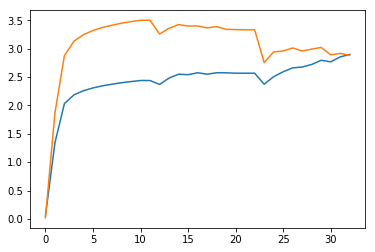

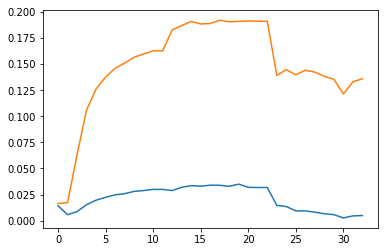

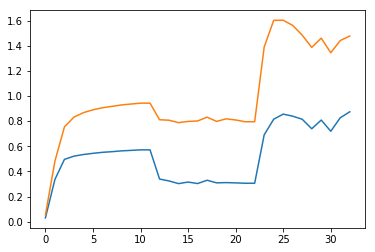

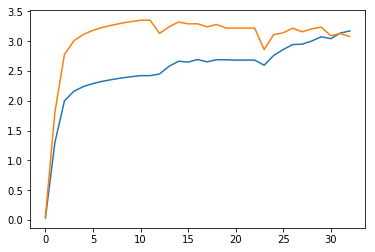

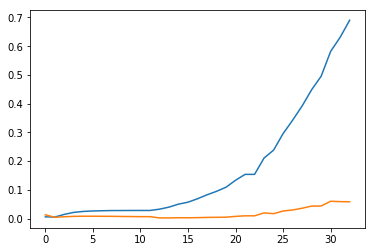

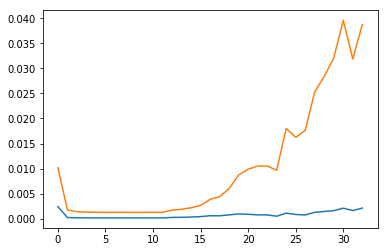

In [50]:
for i in range(num_hidden):
    plt.figure(i)
    plt.plot(range(len(activation_value_h1[0][i])),activation_value_h1[0][i])
    plt.plot(range(len(activation_value_h1[0][i])),activation_value_h1[1][i])
    #plt.plot(range(22),loss_function_data)
plt.show()

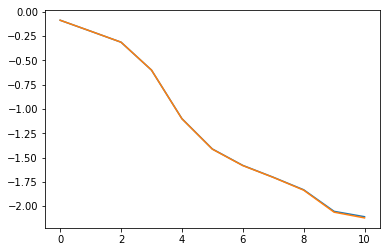

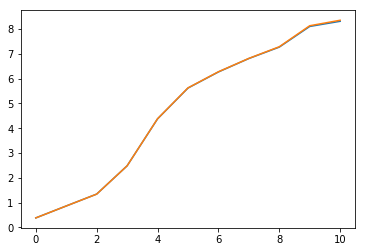

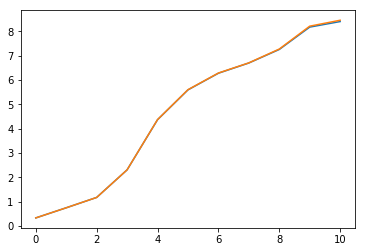

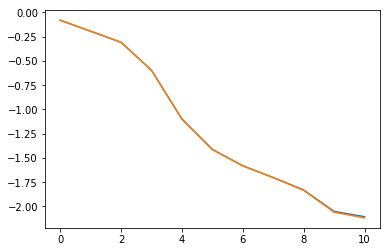

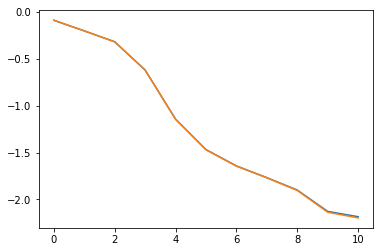

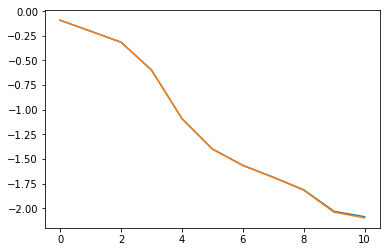

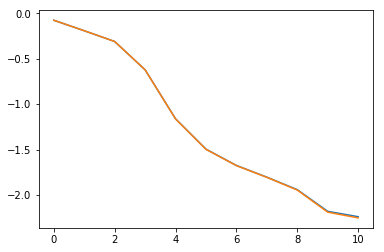

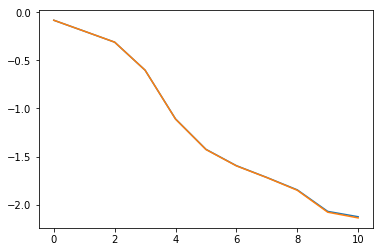

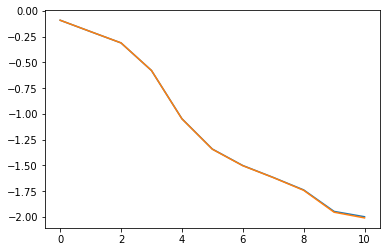

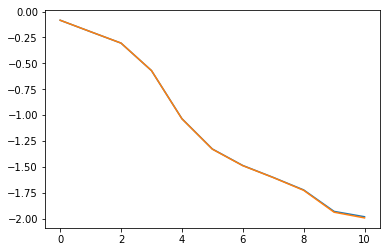

In [62]:
for i in range(num_outputs):
    plt.figure(i)
    plt.plot(range(len(activation_value_h4[0][i])),activation_value_h4[0][i])
    plt.plot(range(len(activation_value_h4[0][i])),activation_value_h4[1][i])
    #plt.plot(range(20),loss_function_data)
plt.show()

## Test Orthogonal 
Neuron activation level for label1 dot neuron activation level for label 2

In [67]:
print(activation_value_h1[0][0])
print(activation_value_h1[1][0])
print(activation_value_h1[0][1])
print(activation_value_h1[1][1])

[2.390414, 2.5085959, 2.574873, 2.619072, 2.6562457, 2.6857324, 2.7080131, 2.7292192, 2.7463212, 2.7631874, 2.0596075, 2.1248302, 2.1775961, 2.2393215, 2.2902155, 2.329325, 2.3577542, 2.3801506, 2.4090595, 2.4411526]
[3.2289736, 3.3653753, 3.4368236, 3.486696, 3.5259075, 3.5593419, 3.5812762, 3.6044111, 3.6202064, 3.6369994, 2.9411983, 2.9935234, 3.0171733, 3.0604043, 3.080704, 3.087708, 3.091588, 3.0810325, 3.082644, 3.0885098]
[0.027147731, 0.031181224, 0.033756707, 0.035733745, 0.03484584, 0.036404308, 0.037421361, 0.037668634, 0.037846345, 0.037347455, 0.050784763, 0.079685226, 0.1053391, 0.11871651, 0.099033535, 0.034622401, 0.012676775, 0.0077794916, 0.0069208709, 0.019444861]
[0.0070660347, 0.0081728939, 0.0091344239, 0.0097543877, 0.0088891685, 0.0093097659, 0.0095294276, 0.0094613349, 0.0093964702, 0.0091321245, 0.32802871, 0.35267985, 0.31201836, 0.28562921, 0.20135634, 0.093166806, 0.061177455, 0.047643144, 0.046462886, 0.095204704]


In [40]:
np.dot([1,2,3],[4,5,6])

32

In [58]:
dot_product=[]
for i in range(30):
    #dot_product.append([])
    dot_product.append(np.dot(activation_value_h1[0][i],activation_value_h1[1][i]))
# dot_result=[]
# for i in range(num_hidden):
#     dot_result.append([])
#     for j in range(20):
#         dot_result[-1].append(dot_product[j][i])
# print(dot_result[0])

In [88]:
print(dot_product)

[0.18722047, 16.012114, 0.00073380762, 0.00055857142, 69.080421, 0.30150846, 112.08687, 6.0551028, 16.16293, 52.554089, 69.921463, 9.1301661, 8.2526267e-06, 5.0714025, 21.004978, 10.129657, 3.9820986, 8.0220137, 0.18434632, 20.53076]


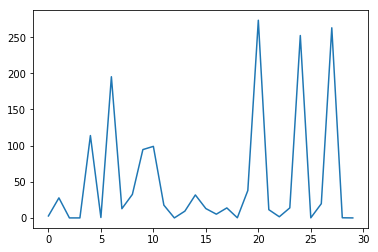

In [60]:
plt.plot(range(30),dot_product)
plt.show()

In [22]:
activation_value_h1[0][i][10]

2.1501746

## Project into 2D space with x axis number 1 and y axis number 2

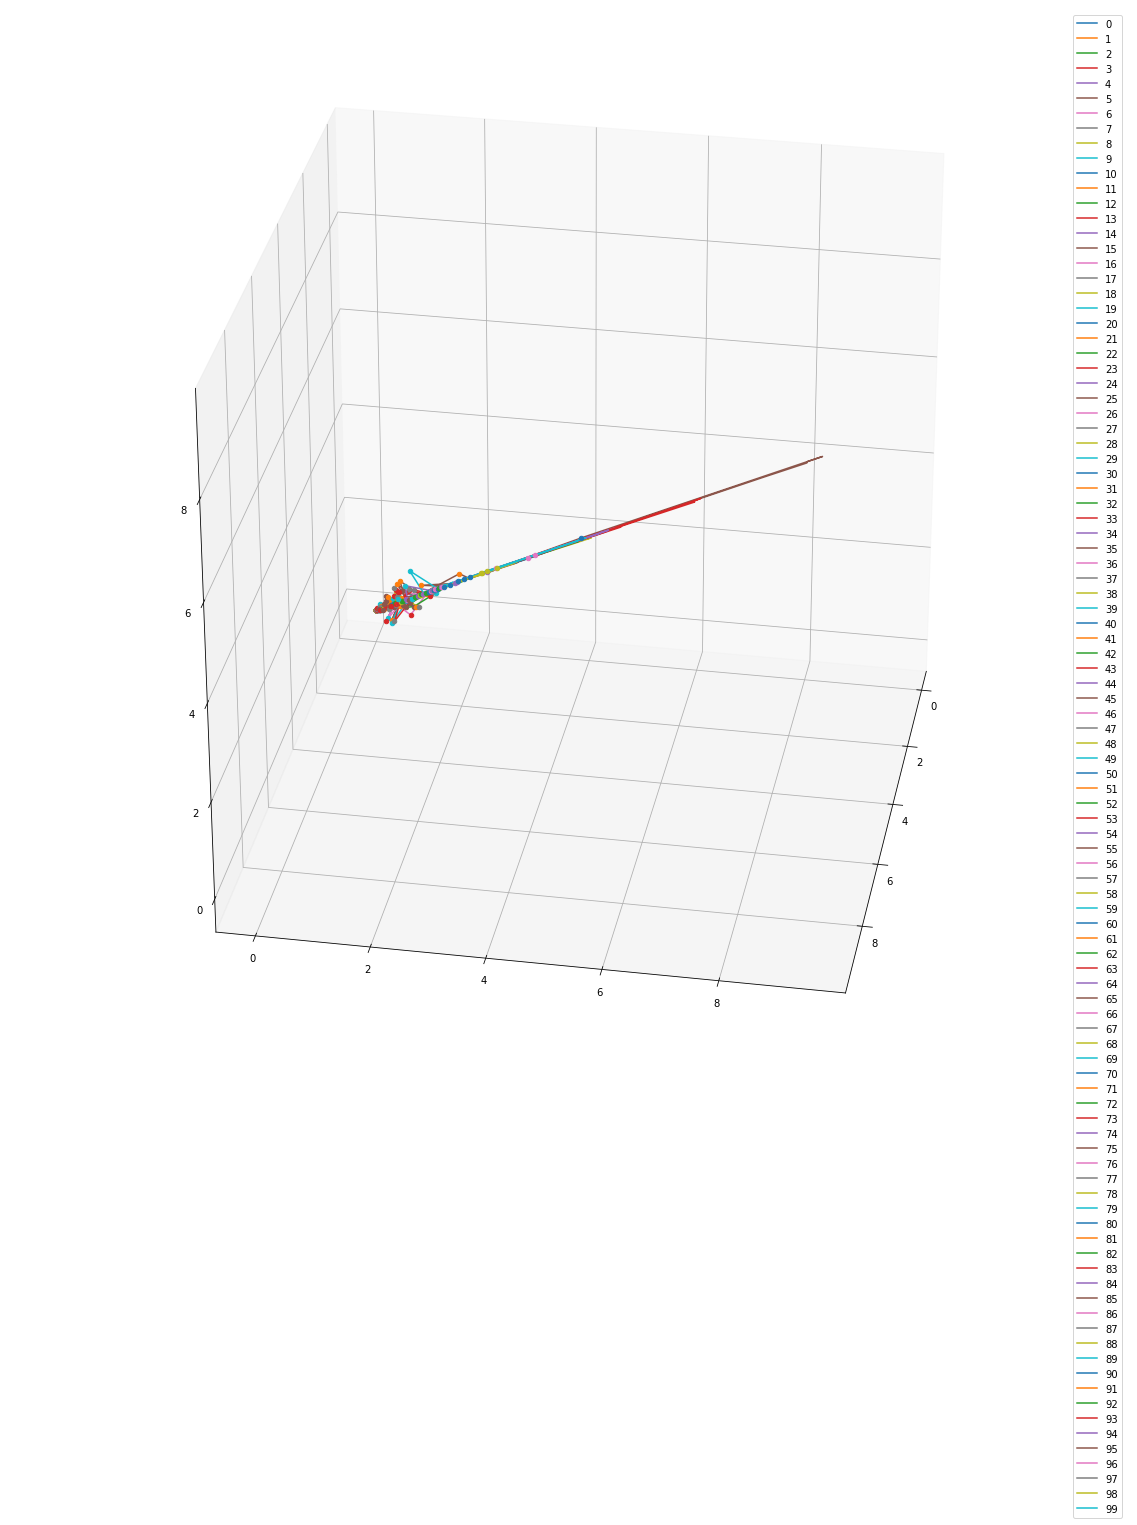

In [25]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig=plt.figure(0,figsize=(20,20))
ax=fig.gca(projection='3d')
for i in range(100):
    ax.plot(activation_value_h3[0][i],activation_value_h3[1][i],activation_value_h3[2][i],label=i)
    #plt.plot(activation_value_h1[0][i],activation_value_h1[1][i],label=i)
    ax.scatter(activation_value_h3[0][i][11],activation_value_h3[1][i][11],activation_value_h3[2][i][11],'ro',label=None)
    ax.scatter(activation_value_h3[0][i][22],activation_value_h3[1][i][22],activation_value_h3[2][i][22],'ro',label=None)
ax.legend()
ax.view_init(30, 10)
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()
# fig=plt.figure(1,figsize=(20,15))
# for i in range(10):
#     plt.plot(activation_value_h2[0][i],activation_value_h2[1][i],label=i)
#     plt.plot(activation_value_h2[0][i][11],activation_value_h2[1][i][11],'ro',label=None)
# plt.legend()


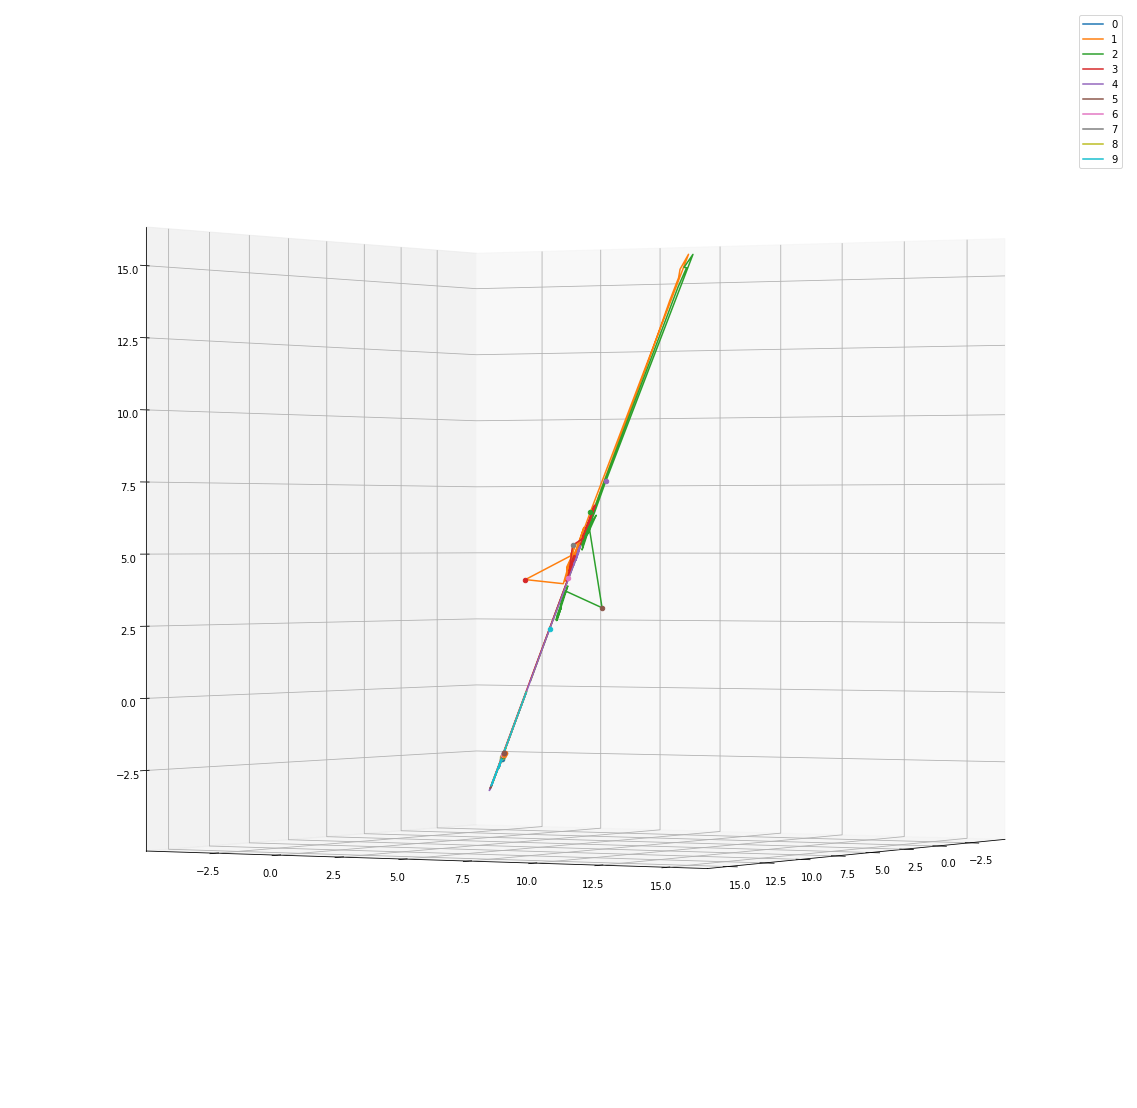

In [26]:
fig=plt.figure(0,figsize=(20,20))
ax=fig.gca(projection='3d')
for i in range(10):
    ax.plot(activation_value_h4[0][i],activation_value_h4[1][i],activation_value_h4[2][i],label=i)
    #plt.plot(activation_value_h1[0][i],activation_value_h1[1][i],label=i)
    ax.scatter(activation_value_h4[0][i][11],activation_value_h4[1][i][11],activation_value_h4[2][i][11],'ro',label=None)
    ax.scatter(activation_value_h4[0][i][22],activation_value_h4[1][i][22],activation_value_h4[2][i][22],'ro',label=None)
ax.legend()
ax.view_init(0, 30)

## Prediction

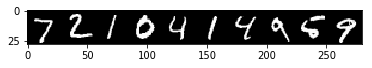

model predictions are: 
[ 7.  2.  1.  0.  4.  1.  4.  9.  6.  9.]
<NDArray 10 @gpu(0)>
true labels: 
[ 7.  2.  1.  0.  4.  1.  4.  9.  5.  9.]
<NDArray 10 @cpu(0)>


In [32]:

def model_predict(net,data):
    output=net(data)
    return nd.argmax(output,axis=1)
samples=10
sample_data=gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False,transform=transform),samples,shuffle=False)
#sample_data=mx.gluon.data.DataLoader(mnist_test,samples,shuffle=True)
for i, (data, label) in enumerate(sample_data):
    data=data.as_in_context(model_ctx)
    im=nd.transpose(data,(1,0,2,3))
    im=nd.reshape(im,(28,10*28,1))
    imtiles=nd.tile(im,(1,1,3))
    
    plt.imshow(imtiles.asnumpy())
    plt.show()
    pred=model_predict(net,data.reshape((-1,784)))
    print('model predictions are:', pred)
    print('true labels:', label)
    break